In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
len(x_train)


60000

In [6]:
len(x_test)

10000

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

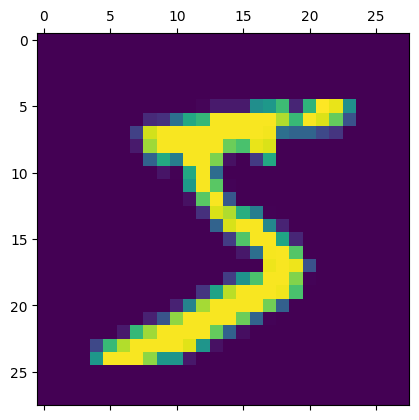

In [9]:
plt.matshow(x_train[0])

In [10]:
y_train[0]


np.uint8(5)

In [11]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
x_train_flatened = x_train.reshape(len(x_train), 784)  # Flatten the images 28*28 to 784
x_test_flatened = x_test.reshape(len(x_test), 784)

In [13]:
x_train_flatened.shape

(60000, 784)

In [14]:
x_test_flatened.shape

(10000, 784)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid'),
    ])# input layer with 784 neurons, output layer with 10 neurons

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flatened, y_train, epochs=5)

c:\Users\asus\venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8763 - loss: 0.4655
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9143 - loss: 0.3043
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9210 - loss: 0.2830
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9237 - loss: 0.2729
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9258 - loss: 0.2666


In [16]:
model.evaluate(x_test_flatened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9261 - loss: 0.2644


[0.2643739879131317, 0.9261000156402588]

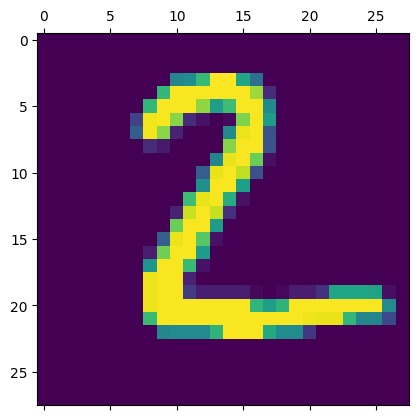

In [17]:
plt.matshow(x_test[1])

In [18]:
y_predicted = model.predict(x_test_flatened)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([4.0566745e-01, 3.8010387e-03, 9.9936688e-01, 2.3880066e-01,
       8.2321416e-10, 8.7374830e-01, 9.2233253e-01, 8.6195992e-13,
       1.5566769e-01, 2.9397724e-09], dtype=float32)

In [19]:
np.argmax(y_predicted[1])


np.int64(2)

In [20]:
tf.math.confusion_matrix(labels=y_test, predictions=np.argmax(y_predicted, axis=1))

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    7,    3,    1,    1],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   4,    9,  918,   15,    9,    5,   13,   12,   43,    4],
       [   4,    0,   15,  915,    0,   32,    3,   11,   20,   10],
       [   1,    1,    4,    1,  914,    0,   10,    4,   10,   37],
       [   7,    2,    3,   28,   10,  783,   18,    6,   28,    7],
       [   9,    3,    4,    1,    7,   12,  918,    2,    2,    0],
       [   1,    5,   21,    5,    7,    0,    0,  953,    3,   33],
       [   6,    7,    6,   18,    9,   31,    9,   13,  868,    7],
       [  11,    7,    1,    9,   25,    7,    0,   21,    4,  924]],
      dtype=int32)>

In [21]:
#Adding a hidden layer in neural network
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),  # Hidden layer with 100 neurons
    keras.layers.Dense(10, activation='sigmoid')  # Output layer with 10 neurons
    ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flatened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9215 - loss: 0.2771
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9634 - loss: 0.1263
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9738 - loss: 0.0887
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9798 - loss: 0.0679
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9833 - loss: 0.0541


In [22]:
tf.math.confusion_matrix(labels=y_test, predictions=np.argmax(y_predicted, axis=1))

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    7,    3,    1,    1],
       [   0, 1108,    3,    2,    0,    1,    4,    2,   15,    0],
       [   4,    9,  918,   15,    9,    5,   13,   12,   43,    4],
       [   4,    0,   15,  915,    0,   32,    3,   11,   20,   10],
       [   1,    1,    4,    1,  914,    0,   10,    4,   10,   37],
       [   7,    2,    3,   28,   10,  783,   18,    6,   28,    7],
       [   9,    3,    4,    1,    7,   12,  918,    2,    2,    0],
       [   1,    5,   21,    5,    7,    0,    0,  953,    3,   33],
       [   6,    7,    6,   18,    9,   31,    9,   13,  868,    7],
       [  11,    7,    1,    9,   25,    7,    0,   21,    4,  924]],
      dtype=int32)>

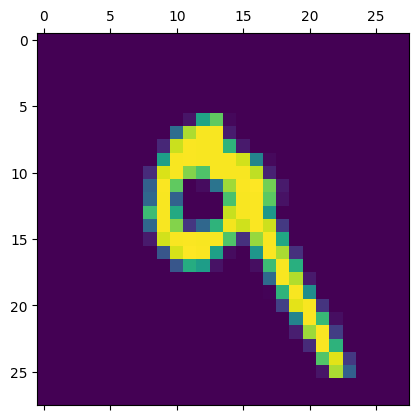

In [25]:
plt.matshow(x_test[7])

In [26]:
np.argmax(y_predicted[7])

np.int64(9)